In [1]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting, prim
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
from ema_workbench.util.utilities import (save_results, load_results)
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load results from scenario discovery
experiment, result = load_results('ANALYSIS_results/01_model_run.tar.gz')

In [9]:
# set up PRIM

# uncertainties
x_prim = experiment[['discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail', 'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax', 'A.5_pfail', 'A.5_Brate']]

# outcomes of interest -> bad outcomes
y_prim = (result['Expected Number of Deaths'] > 0) | (result['Minimum water level full network'] < 4)

In [10]:
# run PRIM
prim_alg = prim.Prim(x_prim, y_prim, threshold=0.8)
box1 = prim_alg.find_box()

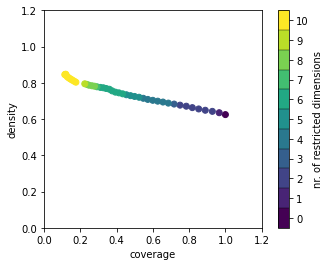

In [11]:
# show tradeoff
box1.show_tradeoff()
plt.show()

coverage    0.174926
density     0.803529
id                33
mass           0.136
mean        0.803529
res_dim           10
Name: 33, dtype: object

                              box 33               \
                                 min          max   
A.3_pfail                    0.00135     0.583346   
A.4_pfail                   0.000082     0.662451   
A.2_pfail                   0.000941      0.75576   
A.5_pfail                   0.000012     0.851669   
A.1_pfail                   0.000462     0.925897   
A.3_Bmax                    30.31813   330.938639   
A.5_Bmax                     30.3484   336.522128   
A.4_Brate                {1.5, 10.0}  {1.5, 10.0}   
A.1_Bmax                   63.980593   337.041463   
A.0_ID flood wave shape         12.0        124.5   

                                                                     
                                                          qp values  
A.3_pfail                             [-1.0, 4.509801010873806e-31]  
A.

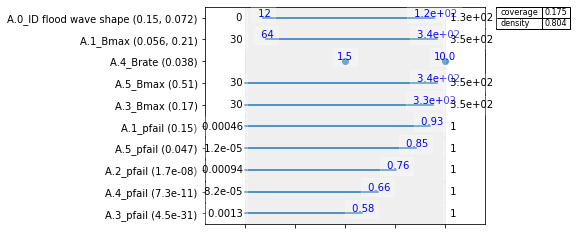

In [24]:
# inspect box
box1.inspect(33)
box1.inspect(33, style='graph')
plt.show()

In [25]:
# select box with making trade-off
box1.select(33)

In [26]:
# get scenarios and outcomes with selected box
scenarios = x_prim.iloc[box1.yi]
outcome = {k:v[box1.yi] for k,v in result.items()}

In [27]:
# save scenarios
scenarios_dict = scenarios.to_dict(orient = 'records')
scenarios_w = []

for s in range(len(scenarios_dict)):
    scenarios_w.append(Scenario(str(s), **scenarios_dict[s]))


In [28]:
import pickle

with open('ANALYSIS_results/02_PRIM_scenarios.txt', 'wb') as file:
    pickle.dump(scenarios_w, file)

In [29]:
len(scenarios_w)

6800